Bắt đầu xử lý thư mục: images_001
Chỉ có 1206 ảnh khớp nhãn trong D:\my_chestxray_subset\images_001\images, sẽ xử lý toàn bộ.
Đang xử lý 1206 ảnh trong D:\my_chestxray_subset\images_001\images...
Đã xử lý 100/1206 ảnh.
Đã xử lý 200/1206 ảnh.
Đã xử lý 300/1206 ảnh.
Đã xử lý 400/1206 ảnh.
Đã xử lý 500/1206 ảnh.
Đã xử lý 600/1206 ảnh.
Đã xử lý 700/1206 ảnh.
Đã xử lý 800/1206 ảnh.
Đã xử lý 900/1206 ảnh.
Đã xử lý 1000/1206 ảnh.
Đã xử lý 1100/1206 ảnh.
Đã xử lý 1200/1206 ảnh.
Đã xử lý 1206/1206 ảnh.
Hoàn tất xử lý 1206 ảnh tại D:\my_chestxray_subset\images_001\images.
Hiển thị ảnh mẫu sau xử lý:


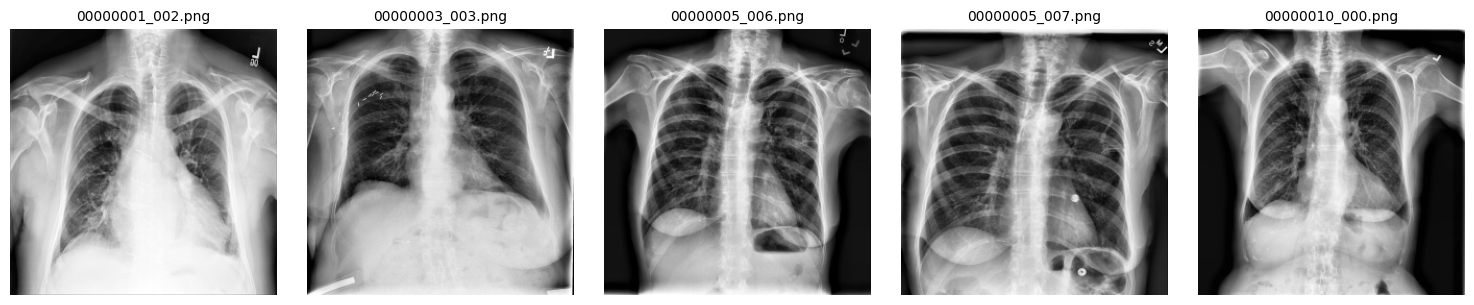

Bắt đầu xử lý thư mục: images_002
Chỉ có 2165 ảnh khớp nhãn trong D:\my_chestxray_subset\images_002\images, sẽ xử lý toàn bộ.
Đang xử lý 2165 ảnh trong D:\my_chestxray_subset\images_002\images...
Đã xử lý 100/2165 ảnh.
Đã xử lý 200/2165 ảnh.
Đã xử lý 300/2165 ảnh.
Đã xử lý 400/2165 ảnh.
Đã xử lý 500/2165 ảnh.
Đã xử lý 600/2165 ảnh.
Đã xử lý 700/2165 ảnh.
Đã xử lý 800/2165 ảnh.
Đã xử lý 900/2165 ảnh.
Đã xử lý 1000/2165 ảnh.
Đã xử lý 1100/2165 ảnh.
Đã xử lý 1200/2165 ảnh.
Đã xử lý 1300/2165 ảnh.
Đã xử lý 1400/2165 ảnh.
Đã xử lý 1500/2165 ảnh.
Đã xử lý 1600/2165 ảnh.
Đã xử lý 1700/2165 ảnh.
Đã xử lý 1800/2165 ảnh.
Đã xử lý 1900/2165 ảnh.
Đã xử lý 2000/2165 ảnh.
Đã xử lý 2100/2165 ảnh.
Đã xử lý 2165/2165 ảnh.
Hoàn tất xử lý 2165 ảnh tại D:\my_chestxray_subset\images_002\images.
Hiển thị ảnh mẫu sau xử lý:


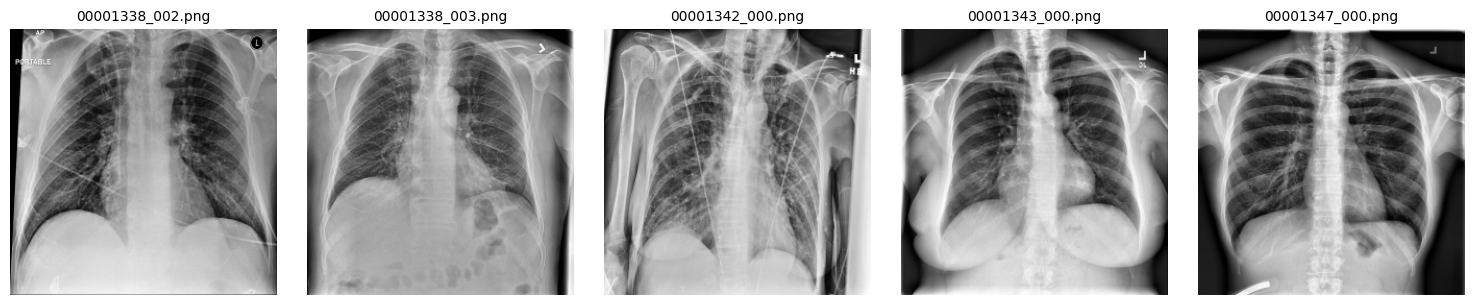

Bắt đầu xử lý thư mục: images_003
Chỉ có 2203 ảnh khớp nhãn trong D:\my_chestxray_subset\images_003\images, sẽ xử lý toàn bộ.
Đang xử lý 2203 ảnh trong D:\my_chestxray_subset\images_003\images...
Đã xử lý 100/2203 ảnh.
Đã xử lý 200/2203 ảnh.
Đã xử lý 300/2203 ảnh.
Đã xử lý 400/2203 ảnh.
Đã xử lý 500/2203 ảnh.
Đã xử lý 600/2203 ảnh.
Đã xử lý 700/2203 ảnh.
Đã xử lý 800/2203 ảnh.
Đã xử lý 900/2203 ảnh.
Đã xử lý 1000/2203 ảnh.
Đã xử lý 1100/2203 ảnh.
Đã xử lý 1200/2203 ảnh.
Đã xử lý 1300/2203 ảnh.
Đã xử lý 1400/2203 ảnh.
Đã xử lý 1500/2203 ảnh.
Đã xử lý 1600/2203 ảnh.
Đã xử lý 1700/2203 ảnh.
Đã xử lý 1800/2203 ảnh.
Đã xử lý 1900/2203 ảnh.
Đã xử lý 2000/2203 ảnh.
Đã xử lý 2100/2203 ảnh.
Đã xử lý 2200/2203 ảnh.
Đã xử lý 2203/2203 ảnh.
Hoàn tất xử lý 2203 ảnh tại D:\my_chestxray_subset\images_003\images.
Hiển thị ảnh mẫu sau xử lý:


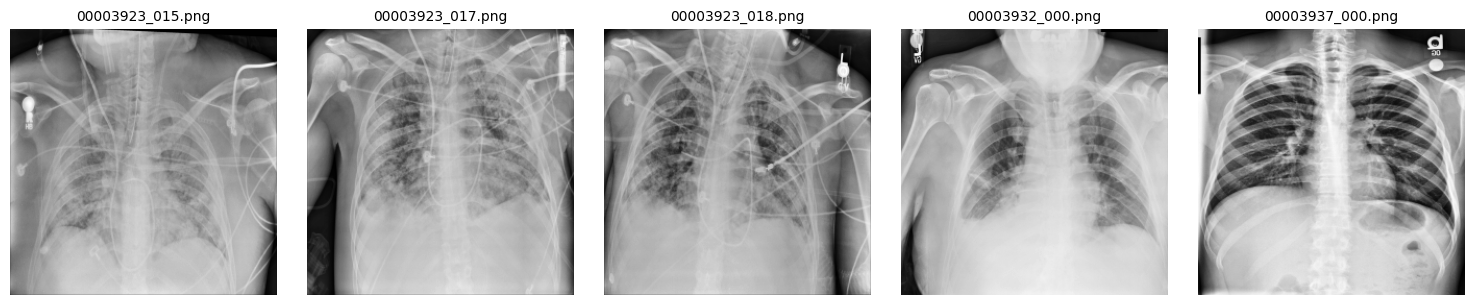

Tiền xử lý hoàn tất.


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

def load_valid_image_names(csv_path, target_labels=None): 
    df = pd.read_csv(csv_path)
    if target_labels: 
        df['Finding Labels'] = df['Finding Labels'].astype(str)
        df['Match']          = df['Finding Labels'].apply(lambda x: any(label in x.split('|') for label in target_labels))
        df                   = df[df['Match']]
    return set(df['Image Index'].values)

def show_sample_images(images, titles, cols=5): 
    rows = len(images)  // cols + int(len(images) % cols != 0)
    plt.figure(figsize=(15, 3 * rows))
    for i in range(len(images)): 
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i], fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def preprocess_chest_xray(image_path, output_dir, valid_image_names, target_size=(256, 256), sample_count=2500): 
    if  not os.path.exists(output_dir)                                                                             : 
        os.makedirs(output_dir)

        all_files       = [f for f in os.listdir(image_path) if f in valid_image_names]
    if len(all_files) == 0:
        print(f"Không tìm thấy ảnh nào khớp với nhãn tại: {image_path}")
        return

    if len(all_files) > sample_count: 
        sampled_files = random.sample(all_files, sample_count)
    else: 
        sampled_files = all_files
        print(f"Chỉ có {len(all_files)} ảnh khớp nhãn trong {image_path}, sẽ xử lý toàn bộ.")

    print(f"Đang xử lý {len(sampled_files)} ảnh trong {image_path}...")

    preview_images = []
    preview_titles = []

    for i, image_file in enumerate(sampled_files): 
        img_path = os.path.join(image_path, image_file)
        try: 
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None: 
                print(f"Không đọc được ảnh: {img_path}. Bỏ qua.")
                continue

            clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
            img   = clahe.apply(img)

            blurred = cv2.GaussianBlur(img, (5, 5), 0)
            _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

            kernel = np.ones((3, 3), np.uint8)
            binary = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

            num_labels, labels,    stats, _ = cv2.connectedComponentsWithStats(binary, 8, cv2.CV_32S)
            max_area  , max_label = 0,    0
            for label in range(1, num_labels): 
                area = stats[label, cv2.CC_STAT_AREA]
                if area > max_area: 
                    max_area  = area
                    max_label = label

            if max_label != 0:
                x , y ,        w, h = (
                    stats[max_label, cv2.CC_STAT_LEFT],
                    stats[max_label, cv2.CC_STAT_TOP],
                    stats[max_label, cv2.CC_STAT_WIDTH],
                    stats[max_label, cv2.CC_STAT_HEIGHT]
                )
                if w > 50 and h > 50: 
                    cropped = img[y:y + h, x:x + w]
                else: 
                    cropped = img
            else: 
                cropped = img

            resized         = cv2.resize(cropped, target_size, interpolation=cv2.INTER_AREA)
            output_filename = f"processed_{image_file}"
            cv2.imwrite(os.path.join(output_dir, output_filename), resized)

            if i < 5: 
                preview_images.append(resized)
                preview_titles.append(image_file)

            if (i + 1) % 100 == 0 or (i + 1) == len(sampled_files):
                print(f"Đã xử lý {i + 1}/{len(sampled_files)} ảnh.")

        except Exception as e: 
            print(f"Lỗi khi xử lý ảnh {img_path}: {e}")

    print(f"Hoàn tất xử lý {len(sampled_files)} ảnh tại {image_path}.")

    # Hiển thị 5 ảnh đầu sau khi xử lý
    if preview_images: 
        print("Hiển thị ảnh mẫu sau xử lý:")
        show_sample_images(preview_images, preview_titles)

# Cấu hình
csv_path = "D:\Data_Entry_2017.csv"
base_dataset_path = "D:\my_chestxray_subset"
output_base_dir = "D:\my_chestxray_subset_preprocessed"
num_samples_per_set = 2500
sub_datasets = ["images_001", "images_002", "images_003"]

target_labels = ["Pneumonia", "Effusion", "Infiltration"]

# Load nhãn
valid_image_names = load_valid_image_names(csv_path, target_labels)

# Thực thi tiền xử lý + hiển thị ảnh mẫu
for subset in sub_datasets:
    input_path = os.path.join(base_dataset_path, subset, "images")
    output_path = os.path.join(output_base_dir, subset)

    if os.path.exists(input_path):
        print(f"Bắt đầu xử lý thư mục: {subset}")
        preprocess_chest_xray(input_path, output_path, valid_image_names, sample_count=num_samples_per_set)
    else:
        print(f"Không tìm thấy thư mục {input_path}")

print("Tiền xử lý hoàn tất.")
